Epoch 1/5
  25/1875 [..............................] - ETA: 8s - loss: 1.8893 - accuracy: 0.3812

2023-03-02 18:57:14.222124: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1871/1875 [============================>.] - ETA: 0s - loss: 0.2566 - accuracy: 0.9240

2023-03-02 18:57:22.486666: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 9s 5ms/step - loss: 0.2564 - accuracy: 0.9240 - val_loss: 0.1326 - val_accuracy: 0.9580
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1041 - accuracy: 0.9678 - val_loss: 0.0933 - val_accuracy: 0.9705
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0753 - accuracy: 0.9769 - val_loss: 0.0898 - val_accuracy: 0.9720
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0573 - accuracy: 0.9819 - val_loss: 0.0868 - val_accuracy: 0.9741
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0467 - accuracy: 0.9851 - val_loss: 0.0844 - val_accuracy: 0.9761
Time taken: 43.44506502151489 seconds


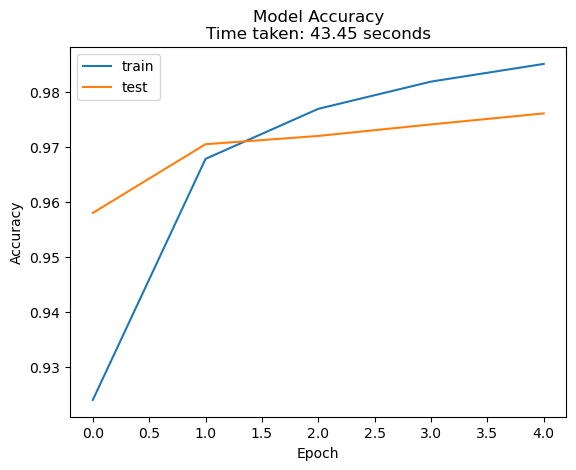

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import time
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model and record the time taken
start_time = time.time()
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), batch_size=32)
end_time = time.time()
print("Time taken:", end_time - start_time, "seconds")

# Plot the accuracy graph with time taken
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy\nTime taken: {:.2f} seconds'.format(end_time - start_time))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
